In [1]:
from IPython.display import Image # For visualisation of image files in Jupyter notebook

from boolnetlab import BN_Realisation as BN

This is how a random Boolean network can be generated:

In [2]:
bn_random = BN.generate_random_bn(num_nodes = 5, max_parent_nodes = 2, min_parent_nodes = 0, allow_self_loops = True, allow_input_nodes = True, mode = 'asynchronous')

Generating a random Boolean network with 5 nodes ... done.
A Boolean network with 5 nodes is generated. The Boolean functions are as follows:
x0 = x0
x1 = x1
x2 = x2
x3 = FALSE
x4 = x4
Number of fixed-value nodes: 4
After SCC we have the following blocks of the structure graph: {0: ({'x0'}, set()), 1: ({'x1'}, set()), 2: ({'x2'}, set()), 3: ({'x4'}, set())}


and saved to a file in the ISPL format:

In [3]:
bn_random.save_ispl('saved_models/bn_random.ispl')

Exporting the Boolean network to the saved_models/bn_random.ispl file in the .ispl format ... done.


Let's load a model of 15 nodes: 

In [4]:
bn = BN.load_ispl('models/bn_7.ispl')

Loaded a Boolean network of 7 nodes.
After SCC we have the following blocks of the structure graph: {0: ({'x2'}, {'x1'}), 1: ({'x5', 'x1', 'x0', 'x6', 'x3'}, {'x4'}), 2: ({'x4'}, set())}


Plot structure (node dependency) graph of the Boolean network with the use of specified layout. The possible layouts are: 'spring' (default), 'circular', 'forceatlas', 'planar', 'random', 'shell', and 'spectral'.

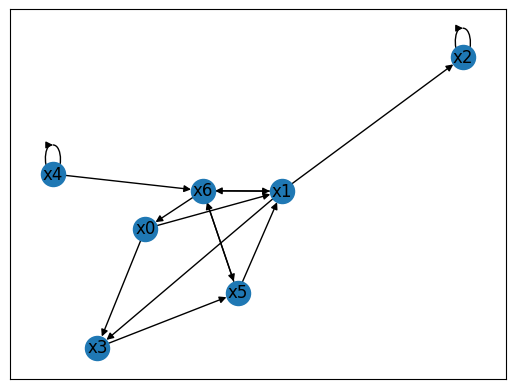

In [5]:
bn.plot_structure_graph()

In [ ]:
bn.plot_structure_graph('planar')

cPlot the structure graph with PyGraphviz and save it to a file:

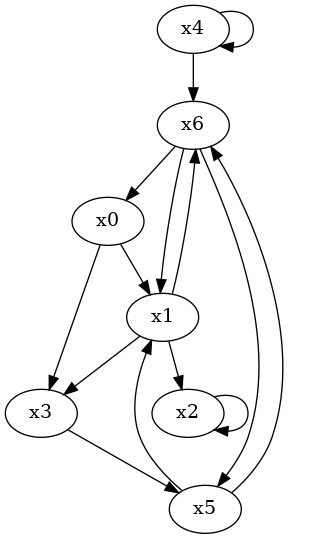

In [6]:
filepath = 'aux/bn_7.png'
bn.plot_structure_graph_pgv(filepath, layout='dot')
Image(filename=filepath)

Make an interactive graph of the BN structure in HTML format. Once the generated HTML file is opened in a web browser:
- the nodes can be moved around,
- howering over edges displays the information on the Boolean function regulating the target node,
- the layout algorithm can be chosen from the 'solver' dropdown list in the 'physics' section below, which also allows to set the specific parameters of the layout algorithm,
- the image can be saved by right-clicking on the graph in the web browser and selecting "Save image as ...".

In [ ]:
filepath = 'aux/bn_15_interactive.html'
bn.plot_structure_graph_interactive(filepath)

Let us now compute the attractors:

In [ ]:
bn_attractors = bn.find_all_attractors()

The method returns a list of Binary Decision Diagrams, each encoding a set of attractor states. The BDD-encoded attractors can be explicitly enumerated with the _enumerate_attractors() method returning a dictionary where keys are strings of the form 'Ai', where i is a consecutive number identifying each attractor (the numbering starts from 0), and each value is a set of attractor states.    

In [ ]:
attractor_states = bn._enumerate_attractors(bn_attractors)
attractor_states

The state transision graph is computed with a brute-force approach and the computations may take a while. The visualisation makes sense for rather small networks of size not more than 10 nodes.

In [ ]:
filepath = 'aux/bn_15_dynamics.png'
bn.draw_state_transition_graph(filepath, highlight_attractors=False)
Image(filename=filepath)

We can color the attractors in the state transition system:

In [ ]:
filepath = 'aux/bn_15_dynamics.png'
bn.draw_state_transition_graph(filepath, highlight_attractors=True, use_bdds=False, transient_state_color='chartreuse')
Image(filename=filepath)

Or we can choose our own colors:

In [ ]:
filepath = 'aux/bn_15_dynamics.png'
bn.draw_state_transition_graph(filepath, highlight_attractors=True, use_bdds=True, color_names=['red', 'green'], transient_state_color='white')
Image(filename=filepath)

Let's now compute the attractors reachable from a list of specified states:

In [ ]:
bn.get_reachable_attractors_with_bdd([(0,1,0,1,0,1,1), (0,1,0,1,1,0,0)])

In [ ]:
bn.get_reachable_attractors_with_edge_removed('x3', 'x0', 3, (0,0,0,1,1,0,0))

In [7]:
bn.getAttractorsMonteCarlo()

WARNING! CUDA is not available, falling back to CPU simulation
WARNING! CUDA is not available, falling back to CPU simulation
[[[True, False, False, True, True, False, False], [True, False, True, True, True, False, False]], [[False, True, False, True, True, True, True]], [[False, False, False, False, False, False, True], [False, False, True, False, False, False, True]], [[False, True, False, True, False, True, True]], [[False, True, True, True, True, True, True]], [[False, True, True, True, False, True, True]]]
